# CenterNet's Limitations and Drawbacks

While being great and bringing a lot of advantages, CenterNet is not perfect!

## I - General Set Up

This cell allows to go up in the tree to have access to everything with the paths from the root of the project.

In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/mathieu.rivier/Desktop/DNN-centerNet


The necessary libraries to compile the notebook are then imported.

```NotebookHelpers``` is a class that was created to enable simpler explanation of CenterNet's limitations

In [2]:
%%capture
import numpy as np

from jupyter.notebook_helpers import NotebookHelpers

## II - Exploring 15 numbers max complex dataset

### 2.1 - Set Up and Exploration

In [14]:
# Setting the path to the data and Instanciating the helper class 
base_path = 'data/complicated/fifteen_numbers/'

fifteen_helpers = NotebookHelpers(base_path)

In [15]:
len(fifteen_helpers.img_indexes)

62

### 2.2 - Understanding the metrics

Average IoU: 0.834

Average Precision & False Discoveries per threshold:
AP_0.05: 0.834
FD_0.05: 0.067
AP_0.5 : 0.792
FD_0.5 : 0.067
AP_0.75: 0.761
FD_0.75: 0.067
AP_0.95: 0.66
FD_0.95: 0.133


Plot of the predictions:


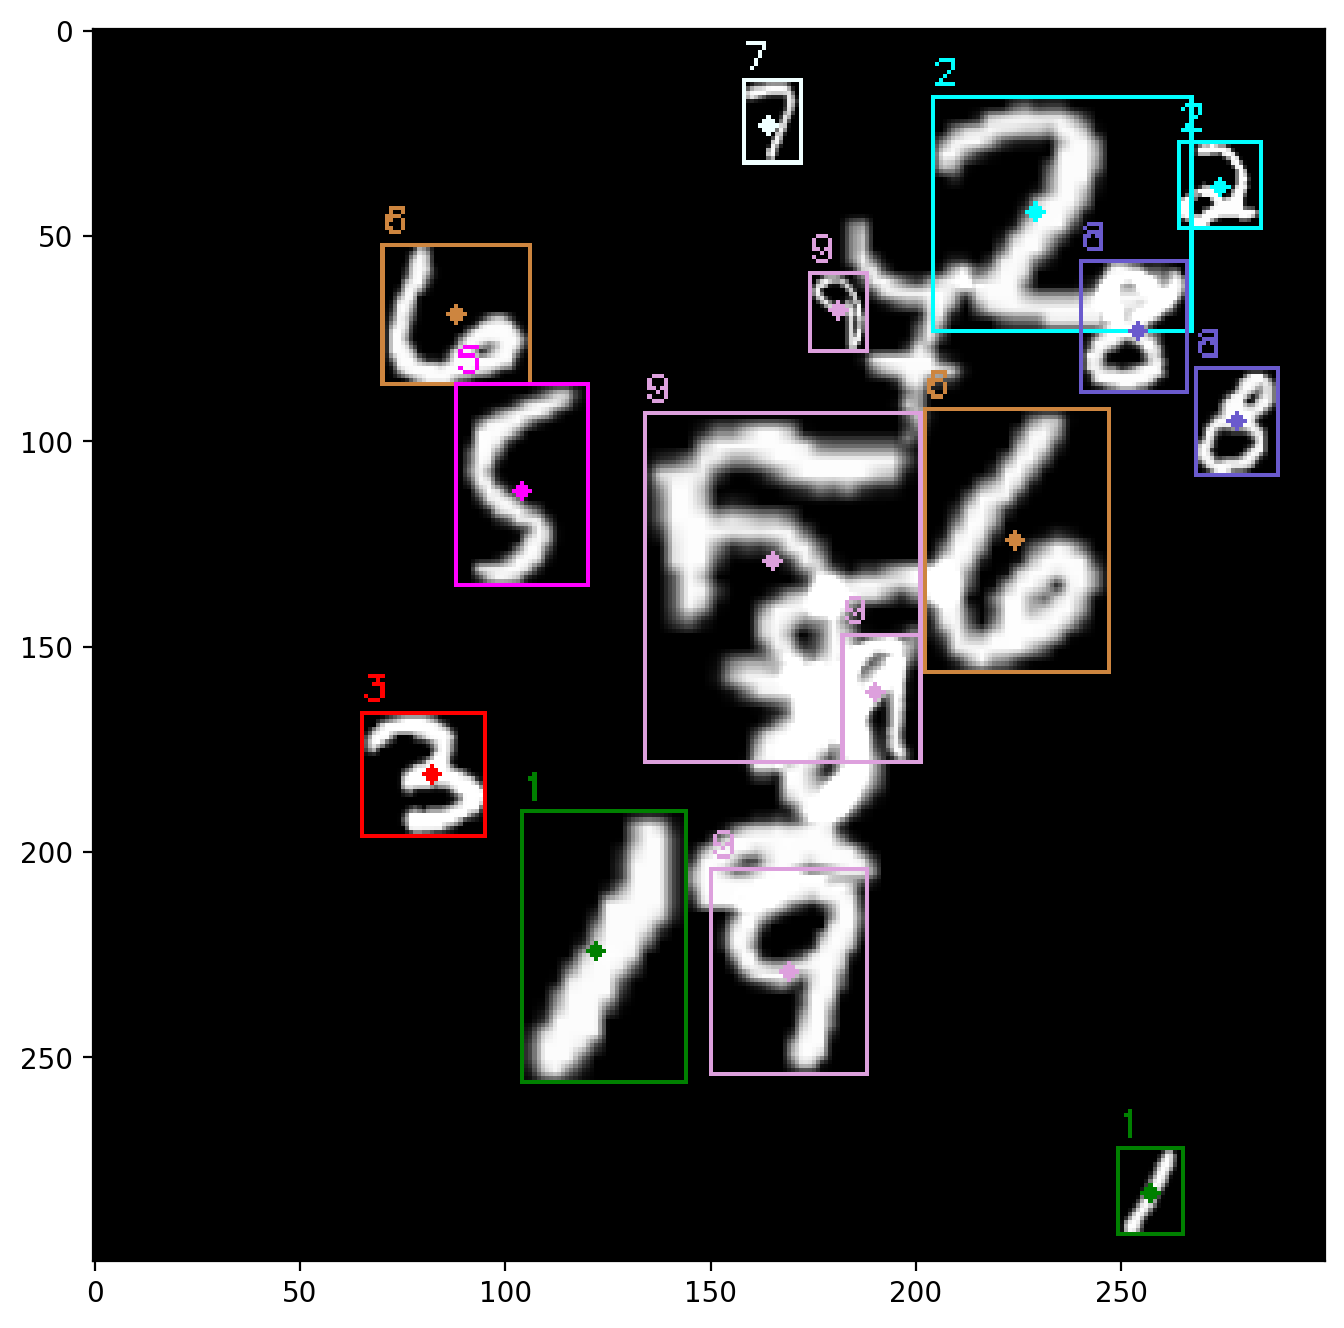

In [23]:
helpers.predict_img(helpers.img_indexes[0], display=True)

### 2.? - Understanding performance  on this dataset

In [5]:
helpers.get_ds_avg_metrics(print=True)

Average Precision & False Discoveries per threshold:
AP_0.05: 0.822
FD_0.05: 0.034
AP_0.5 : 0.794
FD_0.5 : 0.043
AP_0.75: 0.767
FD_0.75: 0.071
AP_0.95: 0.713
FD_0.95: 0.133




## III - Exploring 30 numbers max complex dataset

In [9]:
thirty_base_path = 'data/complicated/thirty_numbers/'

thirty_helpers = NotebookHelpers(thirty_base_path)

In [10]:
len(thirty_helpers.img_indexes)

112

average IoU 0.834

Average Precision & False Discoveries per threshold:
AP_0.05: 0.834
FD_0.05: 0.067
AP_0.5 : 0.792
FD_0.5 : 0.067
AP_0.75: 0.761
FD_0.75: 0.067
AP_0.95: 0.66
FD_0.95: 0.133




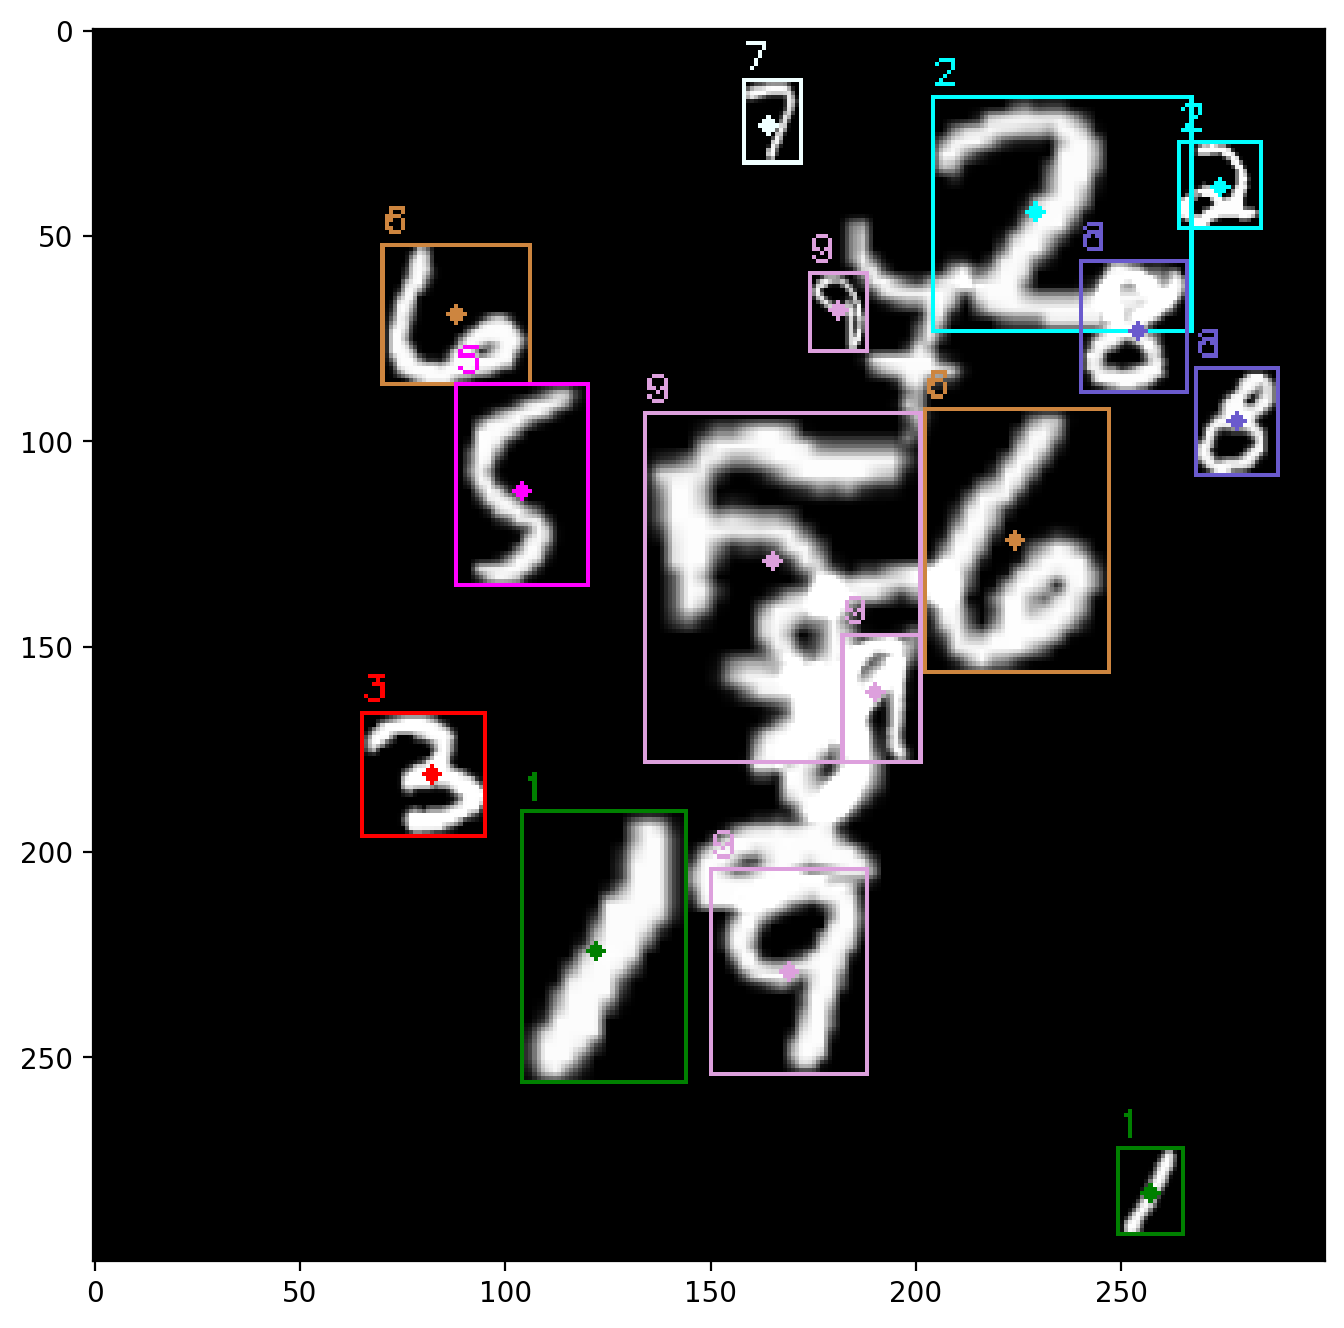

In [11]:
thirty_helpers.pred_image(helpers.img_indexes[0], display=True)

In [15]:
helpers.get_ds_avg_metrics(thirty_data_indexes)

{'AP_0.05': 0.8100949308709777,
 'FD_0.05': 0.05866066054915136,
 'AP_0.5': 0.7677207296189117,
 'FD_0.5': 0.07111692738082682,
 'AP_0.75': 0.7300484553906815,
 'FD_0.75': 0.09476238784467396,
 'AP_0.95': 0.6391828840834775,
 'FD_0.95': 0.20036434352188973}